**CONTEXT :**

If you like to eat cereal, do yourself a favor and avoid this dataset at all
costs. After seeing these data it will never be the same for me to eat Fruity
Pebbles again.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('cereal.csv')

### **OVERVIEW OF A DATA**

In [ ]:
df.head()  #It returns first five rows

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
df.describe()

calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716   
min    -1.000000   -1.000000    0.000000   1.000000   0.500000   0.250000   
25%     3.000000   40.000000   25.000000   1.000000   1.000000   0.670000   
50%     7.000000   90.000000   25.000000   2.000000   1.000000   0.750000   
75%    11.000000  120.000000   25.000000   3.000000   1.000000   1.000000   
max    15.000000  330.000000  100.000000   3.000000   1.500000   1.500000   

          rating  
count  77.000000  
mean   42.665705  
std    14.047289  
min    18.042851  
25%    33.174094  
50%    40.400208  
75%    50.828392  
max    93.704912

In [ ]:
print(df.dtypes)

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


In [ ]:
print("\n\nDataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))



Dataset has 77 rows and 16 columns






*  **This is a small dataset, with only 77 rows of data.
We observed no null values but we do see some weird minimum values for carbo, sugars and potass. I don't think it is possible to see negative values here so I may count the quantity of it and determine if I can remove it or replace it.**





In [ ]:
df[df == -1].count(axis=0)   #Checking if there is a negative value

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
df= df[(df.carbo >= 0) & (df.sugars >= 0) & (df.potass >= 0)]    #Removing the negative value
df[df == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


### **Finding  number of manufacturers available in the dataset**

*   A = American Home Food Products
*   G = General Mills
*   K = Kelloggs
*   N = Nabisco
*   P = Post
*  Q = Quaker Oats
*  R = Ralston Purina













In [ ]:
df['mfr'].value_counts()

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

<Axes: xlabel='mfr', ylabel='rating'>

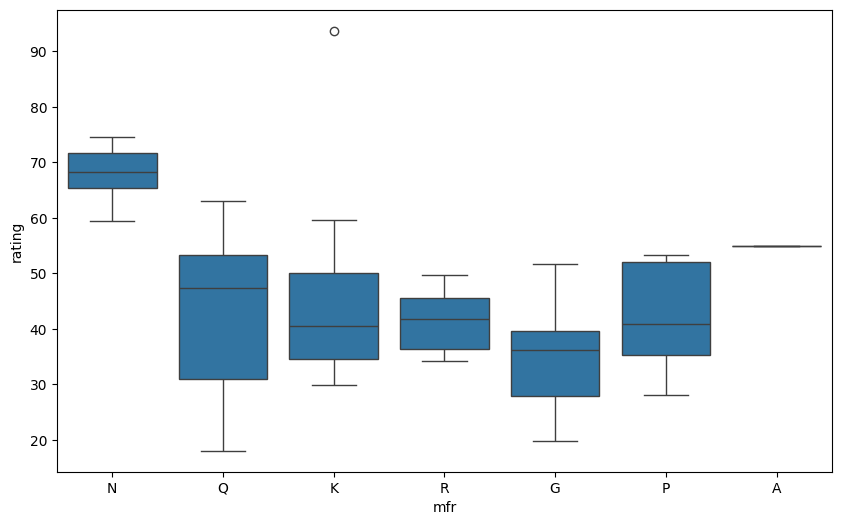

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data= df, x = "mfr", y = "rating")

In [ ]:
# Finding out what are the 4 Nabisco cereals that have high ratings
df.loc[df['mfr'] == "N"]

name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
63             Shredded Wheat   N    C        80        2    0       0    3.0   
64     Shredded Wheat 'n'Bran   N    C        90        3    0       0    4.0   
65  Shredded Wheat spoon size   N    C        90        3    0       0    3.0   
68    Strawberry Fruit Wheats   N    C        90        2    0      15    3.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     5.0       6     280        25      3    1.00  0.33  68.402973  
63   16.0       0      95         0      1    0.83  1.00  68.235885  
64   19.0       0     140         0      1    1.00  0.67  74.472949  
65   20.0       0     120         0      1    1.00  0.67  72.801787  
68   15.0       5      90        25      2    1.00  1.00  59.363993

Except for Strawberry Fruit Wheats, Nabisco's cereals are doing great, especially Shredded Wheat'n'Bran.

In [ ]:
# Lowest rating cereal
df.loc[df['rating'] == min(df.rating)]

name mfr type  calories  protein  fat  sodium  fiber  carbo  \
10  Cap'n'Crunch   Q    C       120        1    2     220    0.0   12.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
10      12      35        25      2     1.0  0.75  18.042851

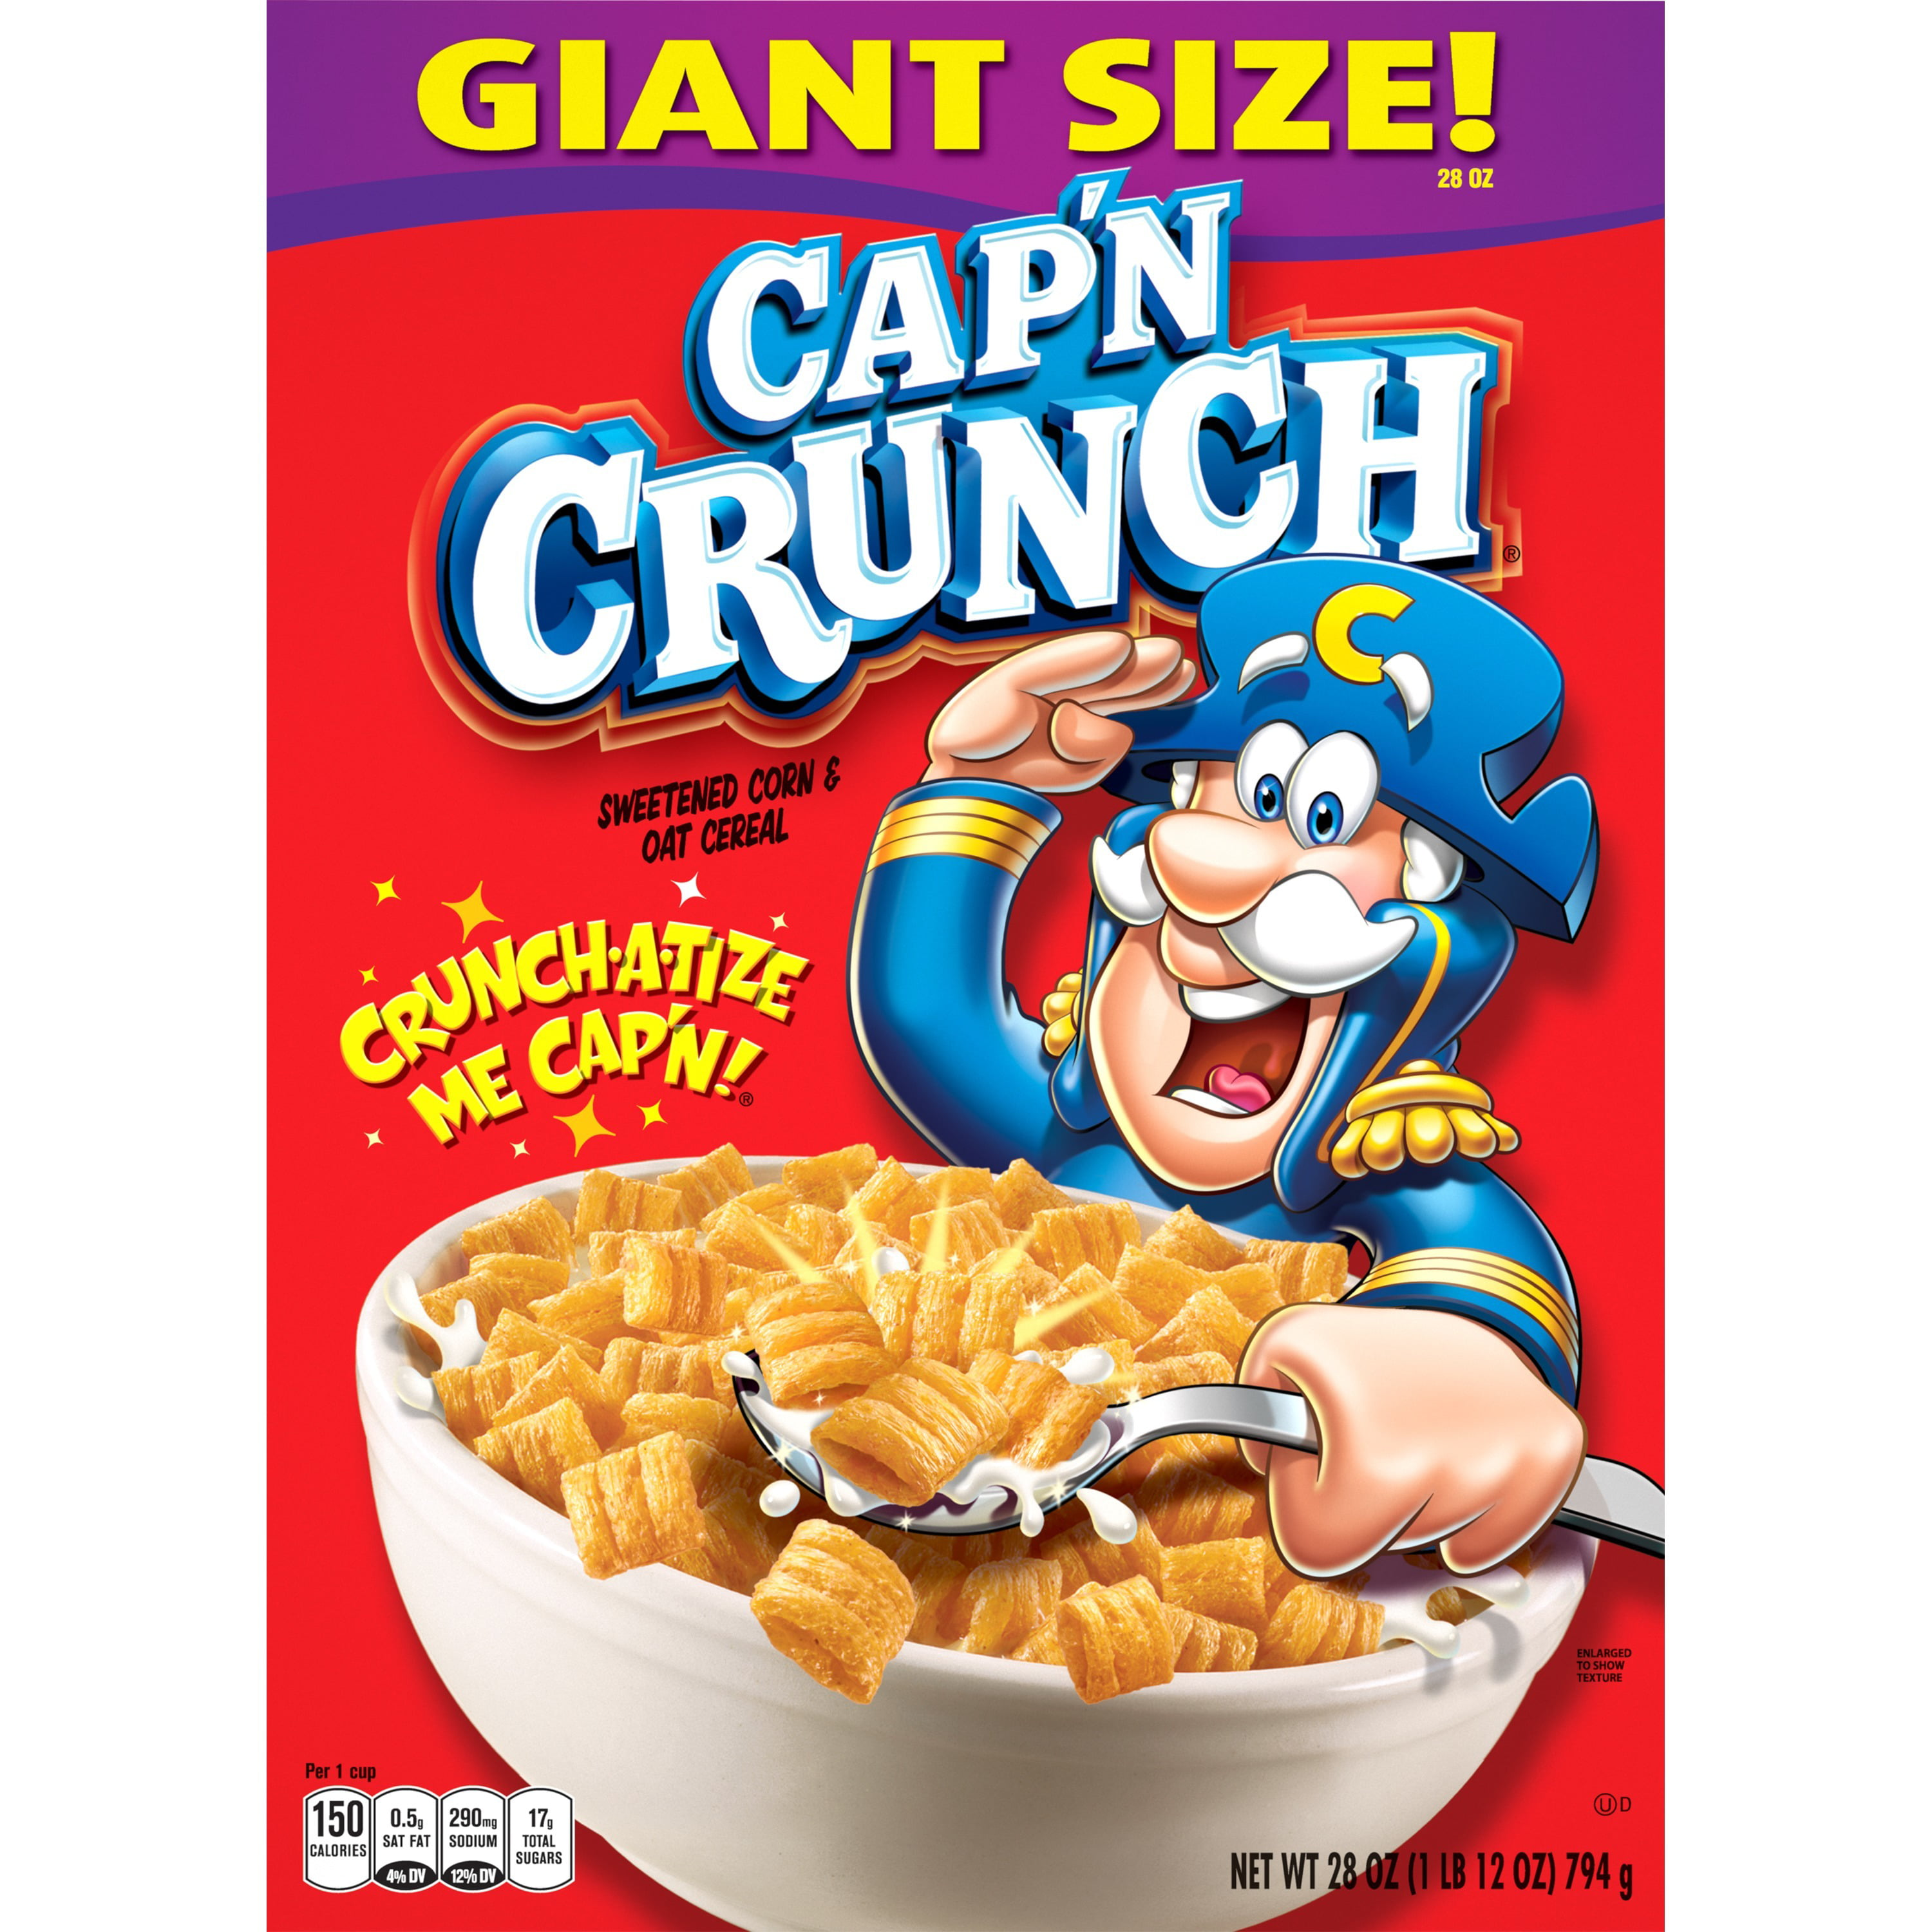

In [ ]:
# Highest rating cereal
df.loc[df['rating'] == max(df.rating)]

name mfr type  calories  protein  fat  sodium  fiber  \
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
3    8.0       0     330        25      3     1.0   0.5  93.704912

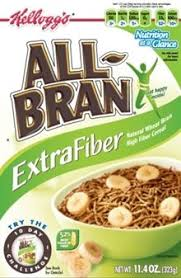

## Does whether a cereal is meant to be eaten hot or cold affect how people rate it?

In [ ]:
print(df['type'].value_counts())
df.loc[df['type'] == "H"]

type
C    73
H     1
Name: count, dtype: int64


name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
43  Maypo   A    H       100        4    1       0    0.0   16.0       3   

    potass  vitamins  shelf  weight  cups     rating  
43      95        25      2     1.0   1.0  54.850917

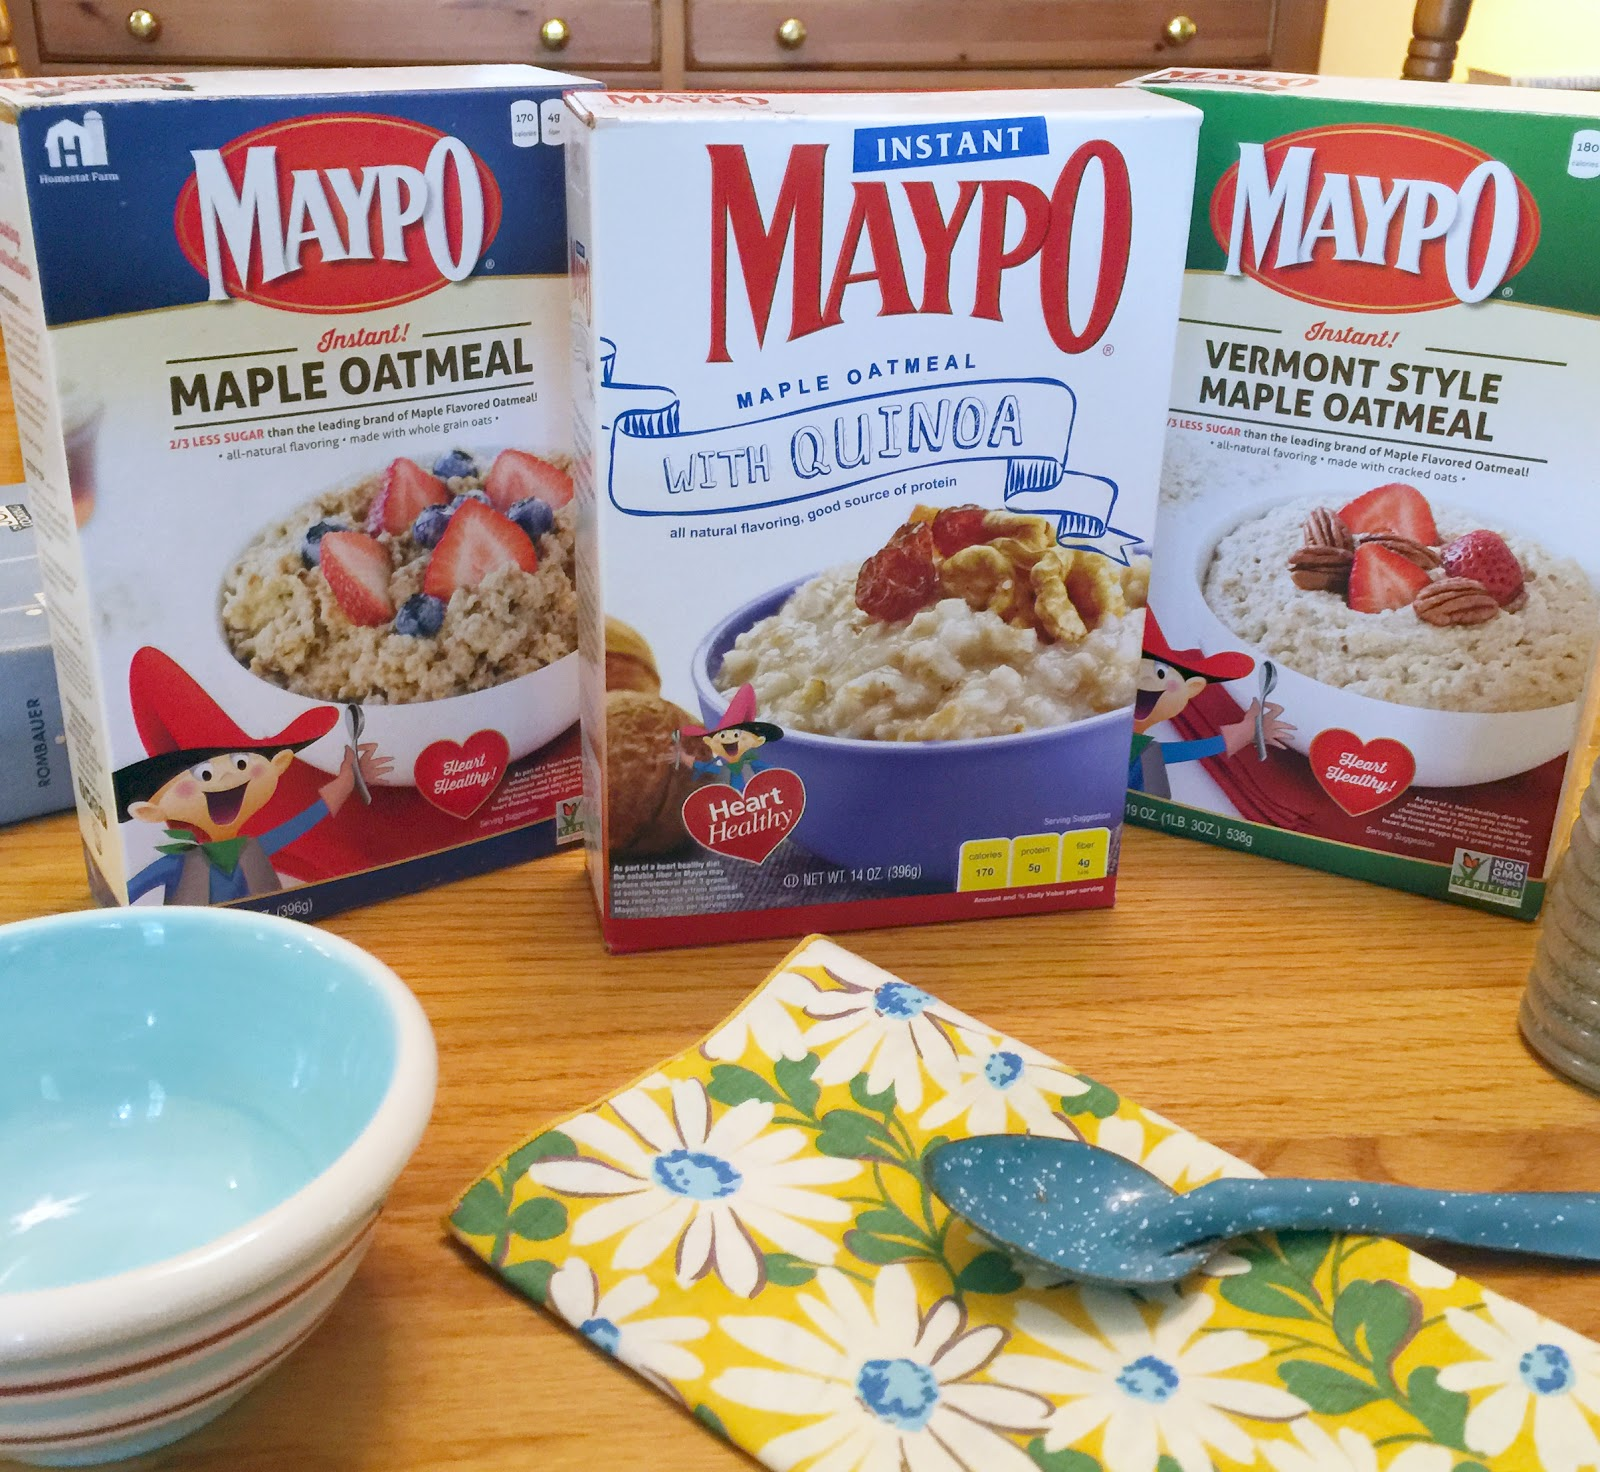

It looks like there's only one type of hot cereal in our data, which is Maypo. Maypo is like oatmeal with quinoa and can be made in the microwave. Personally, I prefer my oatmeal cold with milk and frozen fruit for extra flavor. Warm oatmeal isn't my thing!

## **We can use a method called linear regression to guess how people might rate different cereals based on certain factors.**

*  Measure correlation first




In [ ]:
# Use label encoder on categorical data
le = LabelEncoder()

# Implementing LE on mfr
le.fit(df.mfr.drop_duplicates())
df.mfr = le.transform(df.mfr)

# Implementing LE on type
le.fit(df.type.drop_duplicates())
df.type = le.transform(df.type)

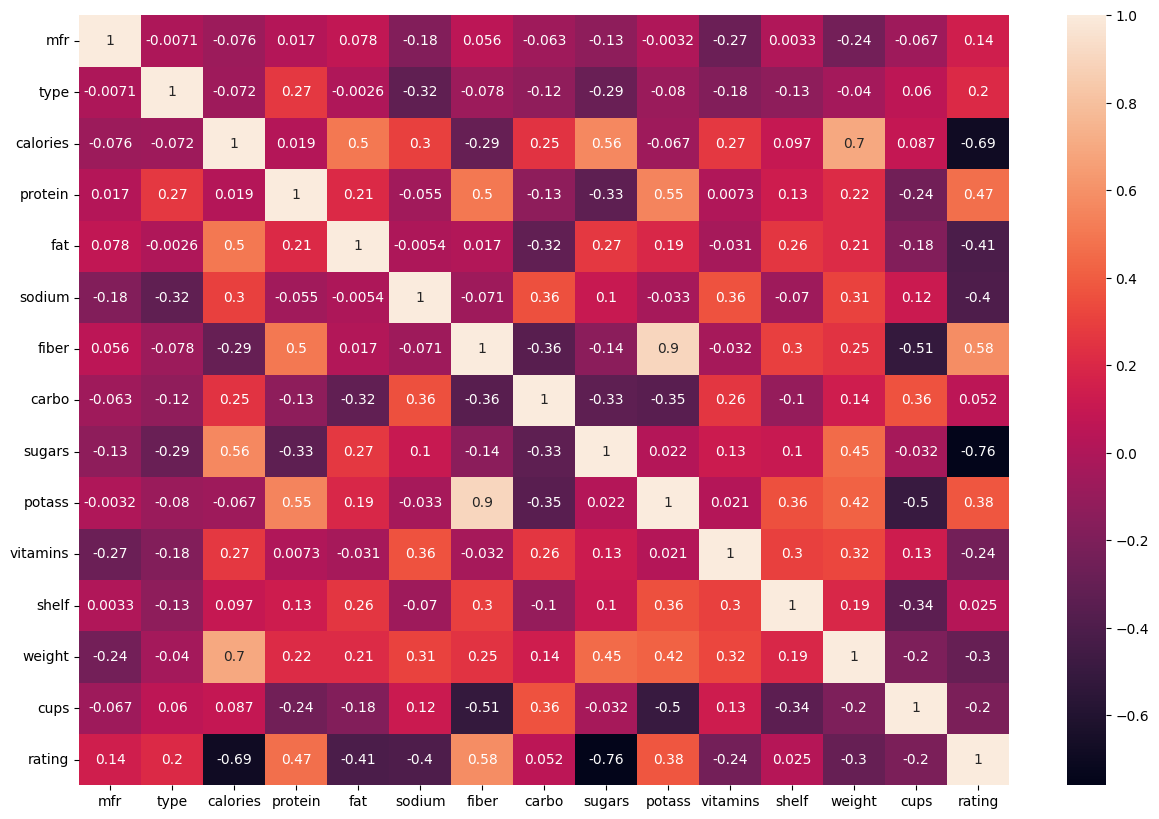

In [ ]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

  * We observed strong positive correlation between
    potassium and ratings, fiber and ratings and protein and ratings.


*   We observed strong negative correlation between
  calories and ratings, fat and ratings, sodium and ratings and sugars and ratings .





In [ ]:
# Creating training and testing dataset
y = df['rating']
X = df.drop(['name','rating'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9999999999999996


## **CONCLUSION**


*   Cereals with high protein and fiber tend to have a higher rating. Both protein and fiber tend to be lowly consumed in a typical diet and supplementing them in cereal will ensure a more balance diet.

*  Cereals with high carbohydrate, fats, sugars, sodium and calories tend to have a much lower rating.

